This notebook experimented with the idea of changing tokens to examine the distance of the new output from the original one. Synonyms were selected using word2vec, and the similarity between outputs was calculated using cosine similarity based on embeddings from sentence transformers. In the next step, it would be useful to consider replacing tokens with antonyms and to investigate the influence of multiple tokens on the generated text.

There was a considerable amount of manual work involved in this notebook, due to the limited time and absence of API calls. By incorporating API calls, the steps can be automated more easily.

In [1]:
from sentence_transformers import SentenceTransformer, util
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [3]:
def calculate_similarity_emb_vs_text(model, embedding, text):
    embedding_compared = model.encode(text)
    cosine_scores = util.pytorch_cos_sim(embedding, embedding_compared)
    return cosine_scores.item()

def calculate_similarity(model, embedding, texts):
    index = 0
    sum = 0
    for text in texts:
        sum += calculate_similarity_emb_vs_text(model, embedding, text)
        index += 1
    return sum/index

In [4]:
Question="Use three sentences to answer: What is Allianz?"
ChatGPT_original_answer="Allianz is a multinational financial services company based in Germany. It offers a range of insurance and asset management products and services to individuals and businesses worldwide. Allianz is one of the largest insurance companies in the world by revenue and has a strong presence in Europe, North America, and Asia."
embedding_origin = model.encode(ChatGPT_original_answer)

In [5]:
weight_dict = defaultdict(float)

In [6]:
#get chatgpt answer
#remove stop words, split sentences, tokenize
#get the closet words for each word in each sentence as a dictionary using like word2vec

# I used the following code in my local to get the neighbors, but not recommand to run here, the downloading would take long.
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')
# neighbors = wv.most_similar('multinational', topn=20))

# an alternative is to use wordnet
# import nltk
# nltk.download('wordnet')
# from nltk.corpus import wordnet
# syn = list()
# ant = list()
# for synset in wordnet.synsets("headquarter"):
#    for lemma in synset.lemmas():
#       syn.append(lemma.name())
#       if lemma.antonyms():
#         ant.append(lemma.antonyms()[0].name())
# print('Synonyms: ' + str(syn))
# print('Antonyms: ' + str(ant))

# cleaning neighbors (edited distance can be used here) and keep top 3
# put into a dictionary

nearest_neighbor={"multinational": ["transnational", "international", "global"],
                  "financial":["banking", "investment", "liqudity"],
                  "services": ["provider"],
                  "company": ["firm", "subsidiary", "corporation"],
                  "based": ["headquartered", "held","located"],
                  "Germany": ["europe", "sweden", "switzerland"]}

In [7]:
#multinational
input_transnational = "Use three sentences to answer: What is Allianz? Allianz is a transnational"
output_transnational = "Allianz is a transnational financial corporation headquartered in Germany, providing a diverse range of insurance and asset management services to individuals, businesses, and institutional clients globally. With operations in over 70 countries, Allianz is one of the world's leading insurance companies, serving over 100 million customers worldwide. Allianz has a reputation for financial stability, innovation, and responsible business practices."
input_international = "Use three sentences to answer: What is Allianz? Allianz is a international"
output_international = "Allianz is a international financial services company headquartered in Munich, Germany, providing insurance, asset management, and other financial products and services to individuals, businesses, and institutions worldwide. With a history dating back to the 19th century, Allianz has grown to become one of the largest financial services companies in the world, with operations in more than 70 countries and a workforce of over 150,000 employees. Allianz is known for its strong financial performance, customer service, and commitment to sustainability and social responsibility."
input_global = "Use three sentences to answer: What is Allianz? Allianz is a global"
output_global = "Allianz is a global financial services firm headquartered in Germany, offering a wide range of insurance, asset management, and other financial products and services to individuals, businesses, and institutions worldwide. With a presence in over 70 countries and a workforce of more than 150,000 employees, Allianz is one of the largest insurance companies in the world, serving millions of customers. Allianz is committed to innovation, digital transformation, and sustainability, with a focus on creating long-term value for its stakeholders."

texts_multinational = [output_transnational, output_international, output_global]
weight_dict["multinational"] = 1 - calculate_similarity(model, embedding_origin, texts_multinational)

In [8]:
#financial
input_banking = "Use three sentences to answer: What is Allianz? Allianz is a multinational banking"
output_banking = "Allianz is a multinational banking and financial services corporation based in Germany, specializing in insurance, asset management, and investment banking products and services. With operations in over 70 countries and a strong focus on innovation and digital transformation, Allianz is one of the largest financial services companies in the world. Allianz is known for its strong financial performance, customer-centric approach, and commitment to sustainable business practices."
input_investment = "Use three sentences to answer: What is Allianz? Allianz is a multinational investment"
output_investment = "Allianz is a multinational investment firm headquartered in Germany, specializing in insurance, asset management, and other financial services for individuals, businesses, and institutional clients worldwide. With a history dating back over 125 years, Allianz is one of the world's leading investment firms, managing over €2 trillion in assets under management. Allianz is known for its financial strength, innovation, and commitment to sustainability and responsible investing."
input_liqudity = "Use three sentences to answer: What is Allianz? Allianz is a multinational liqudity"
output_liqudity = "provider and asset manager, headquartered in Germany, offering a wide range of financial products and services such as insurance, investment management, and banking to individuals, businesses, and institutional clients worldwide. With a presence in over 70 countries and over 150,000 employees, Allianz is one of the largest financial services companies in the world, with a focus on long-term value creation and sustainable business practices. Allianz is committed to driving innovation and digital transformation in the financial industry, and has a reputation for financial strength and stability."

texts_financial = [output_banking, output_investment, output_liqudity]
weight_dict["financial"] = 1 - calculate_similarity(model, embedding_origin, texts_financial)

In [9]:
#services
input_provider = "Use three sentences to answer: What is Allianz? Allianz is a multinational financial provider"
output_provider = "Allianz is a multinational financial provider headquartered in Germany, offering insurance, asset management, and other financial products and services to individuals, businesses, and institutional clients worldwide. With a presence in over 70 countries, Allianz is one of the largest financial services companies in the world, serving millions of customers. Allianz is committed to sustainability, innovation, and responsible business practices, and has a reputation for financial strength and stability."

texts_provider = [output_provider]
weight_dict["services"] = 1 - calculate_similarity(model, embedding_origin, texts_provider)

In [10]:
#company
input_firm = "Use three sentences to answer: What is Allianz? Allianz is a multinational financial services firm"
output_firm = "with headquarters in Munich, Germany, offering a diverse range of financial products and services such as insurance, asset management, and investment banking to clients globally. Allianz has operations in over 70 countries and is one of the largest financial services firms in the world, with a reputation for financial strength, innovation, and sustainability. Allianz is committed to serving its customers evolving financial needs and contributing to long-term economic growth while also promoting social and environmental responsibility."
input_subsidiary = "Use three sentences to answer: What is Allianz? Allianz is a multinational financial services subsidiary"
output_subsidiary = "Allianz is a multinational financial services subsidiary of the Allianz Group, a German financial services conglomerate. Allianz offers a wide range of financial products and services, including insurance, asset management, and banking, to individuals, businesses, and institutional clients worldwide. With operations in over 70 countries, Allianz is one of the largest financial services companies in the world and is known for its financial strength, innovation, and commitment to sustainability."
input_corporation = "Use three sentences to answer: What is Allianz? Allianz is a multinational financial services corporation"
output_corporation = "Allianz is a multinational financial services corporation headquartered in Munich, Germany, offering a broad range of financial products and services to individuals, businesses, and institutional clients worldwide. These offerings include insurance, asset management, and investment products and services. Allianz is committed to sustainability and responsible business practices, and has a reputation for financial strength, innovation, and customer service excellence."

texts_company = [output_firm, output_subsidiary, output_corporation]
weight_dict["company"] = 1 - calculate_similarity(model, embedding_origin, texts_company)

In [11]:
#based
input_headquartered = "Use three sentences to answer: What is Allianz? Allianz is a multinational financial services company headquartered"
output_headquartered = "Allianz is a multinational financial services company headquartered in Munich, Germany, providing a wide range of financial solutions, including insurance, asset management, and banking services, to individuals, businesses, and institutional clients worldwide. With operations in over 70 countries, Allianz is one of the largest financial services companies in the world, with a focus on innovation, customer service, and sustainable business practices. Allianz is committed to creating long-term value for its stakeholders, including its customers, employees, and shareholders, and contributing to social and economic progress."
input_founded = "Use three sentences to answer: What is Allianz? Allianz is a multinational financial services company founded"
output_founded = "Allianz is a multinational financial services company founded in Germany in 1890, providing a broad range of financial products and services such as insurance, asset management, and investment banking to individuals, businesses, and institutional clients worldwide. Allianz is committed to promoting sustainable business practices and environmental stewardship, and has a strong reputation for financial strength, innovation, and customer service excellence. With a presence in over 70 countries, Allianz is one of the world's largest financial services companies, serving millions of customers and contributing to long-term economic growth."
input_located = "Use three sentences to answer: What is Allianz? Allianz is a multinational financial services company located"
output_located = "Allianz is a multinational financial services company located in Munich, Germany, offering a broad range of financial products and services such as insurance, asset management, and investment banking to clients worldwide. Allianz has a reputation for financial strength, innovation, and customer service excellence and is committed to sustainability and responsible business practices. With operations in over 70 countries, Allianz is one of the largest financial services companies in the world, serving millions of customers and contributing to long-term economic growth."

texts_based = [output_headquartered, output_founded, output_located]
weight_dict["based"] = 1 - calculate_similarity(model, embedding_origin, texts_based)

In [12]:
#Germany
input_europe = "Use three sentences to answer: Allianz is a multinational financial services company based in europe"
output_europe = "Allianz is a multinational financial services company based in europe with headquarters in Munich, Germany, Allianz is a leading multinational financial services provider operating across Europe and other regions globally. The company offers a range of financial products and services such as insurance, asset management, and investment banking to clients across diverse sectors. Allianz is renowned for its financial strength, innovation, and commitment to sustainability, making it one of the most trusted and respected companies in the financial services industry."
input_sweden = "Use three sentences to answer: Allianz is a multinational financial services company based in sweden"
output_sweden = "I'm sorry, but that is not correct. Allianz is a multinational financial services company headquartered in Munich, Germany. It operates in over 70 countries worldwide, but Sweden is not the location of its headquarters. However, Allianz does have a presence in Sweden and offers financial products and services such as insurance, asset management, and banking to clients in the country."
input_switzerland = "Use three sentences to answer: Allianz is a multinational financial services company based in switzerland"
output_switzerland = "I'm sorry, but that is not correct. Allianz is a multinational financial services company headquartered in Munich, Germany. It operates in over 70 countries worldwide, but Switzerland is not the location of its headquarters. However, Allianz does have a presence in Switzerland and offers financial products and services such as insurance, asset management, and banking to clients in the country."

texts_germany = [output_europe, output_sweden, output_switzerland]
weight_dict["germany"] = 1 - calculate_similarity(model, embedding_origin, texts_germany)

In [13]:
weight_dict

defaultdict(float,
            {'multinational': 0.052650272846221924,
             'financial': 0.09142875671386719,
             'services': 0.05805099010467529,
             'company': 0.09363832076390588,
             'based': 0.07653830448786414,
             'germany': 0.10140099128087365})

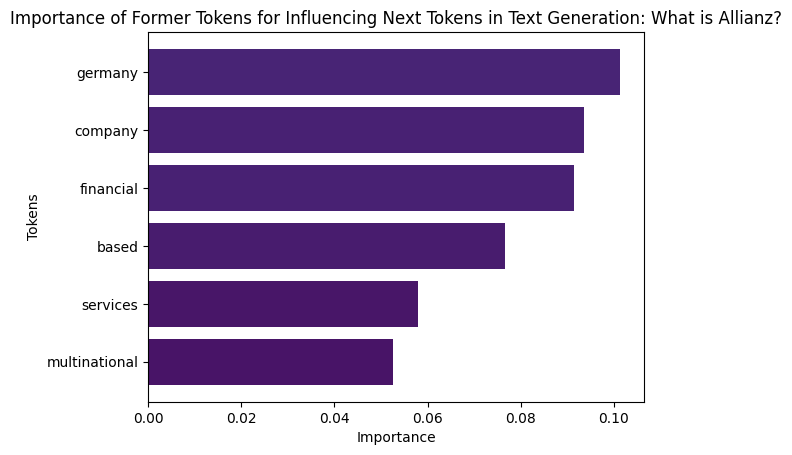

In [14]:
import numpy as np
from matplotlib.colors import Normalize

items = list(weight_dict.items())
items.sort(key=lambda x: x[1])
sorted_weight_dict = dict(items)

keys = list(sorted_weight_dict.keys())
values = list(sorted_weight_dict.values())

cmap = plt.colormaps['viridis']
colors = [cmap(value) for value in values]

plt.barh(keys, values, color=colors)
plt.xlabel('Importance')
plt.ylabel('Tokens')
plt.title('Importance of Former Tokens for Influencing Next Tokens in Text Generation: What is Allianz?')
plt.show()

If the output generated by ChatGPT by replacing tokens with synonyms has a low similarity to the original output, this may indicate that particular tokens are important for generating the subsequent text. Therefore, we need to assign higher weights to these tokens. So for this example, we can see **Allianz is a financial company based in Germany**.

However, this experiment does not take antonyms into consideration. We may also consider how to use both synonyms and antonyms to explain the generation results.